
# Bankruptcy Risk Estimator 

## Rahi Patel

In this project, I used python to estimate the chance of bankruptcy from qualitative parameters by experts. I built a Naive Bayes machine learning model, split the dataset into training and testing set, trained the model on the training set, and made predictions of the 'Class' for test set, and evaluated the model's accuracy. 

### Dataset Information:
(P=Positive, A-Average, N-negative, B-Bankruptcy, NB-Non-Bankruptcy)

1. Industrial Risk: {P,A,N}
2. Management Risk: {P,A,N}
3. Financial Flexibility: {P,A,N}
4. Credibility: {P,A,N}
5. Competitiveness: {P,A,N}
6. Operating Risk: {P,A,N}
7. Class: {B,NB}

i. Industry risk (IR): 
    Government policies and International agreements, 
    Cyclicality, 
    Degree of competition,
    The price and stability of market supply,
    The size and growth of market demand,
    The sensitivity to changes in macroeconomic factors,
    Domestic and international competitive power, 
    Product Life Cycle.

ii. Management risk(MR): 
    Ability and competence of management, 
    Stability of management,
    The relationship between management/ owner, 
    Human resources management, 
    Growth process/business performance, 
    Short and long term business planning, 
    achievement and feasibility. 

iii. Financial Flexibility(FF): 
    Direct financing, 
    Indirect financing, 
    Other financing 

iv. Credibility (CR):
    Credit history,
    reliability of information, 
    The relationship with financial institutes.

v. Competitiveness (CO):
    Market position, 
    The level of core capacities, 
    Differentiated strategy, 

vi. Operating Risk (OP):
    The stability and diversity of procurement, 
    The stability of transaction, 
    The efficiency of production, 
    The prospects for demand for product and service, 
    Sales diversification,
    Sales price and settlement condition, 
    Collection of A/R,
    Effectiveness of sale network.
    
### The dataset was acquired from:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB

In [7]:
# load in the dataset
df = pd.read_csv("dat.txt")

In [8]:
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [9]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    object
 1   Management Risk        250 non-null    object
 2   Financial Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [10]:
df.shape

(250, 7)

In [11]:
# Check for missing values
df.isnull().sum()

Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

In [12]:
df.Class.value_counts()

NB    143
B     107
Name: Class, dtype: int64

In [13]:
# calculate the prior probabilities of the CLass
priors = df.Class.value_counts()
priors

NB    143
B     107
Name: Class, dtype: int64

In [14]:
# Split the data into training set and testing set 
y = df.Class
x = df.drop(columns = 'Class')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, stratify = y, random_state = 2)
train_dat = pd.concat([x_train, y_train], axis = 1)
test_dat = pd.concat([x_test, y_test], axis = 1)

In [15]:
print(x.shape, train_dat.shape, test_dat.shape)

(250, 6) (200, 7) (50, 7)


In [16]:
# for each class, show its subset dataset
for cls, subset in train_dat.groupby('Class'):
    print(subset)
    

    Industrial Risk Management Risk Financial Flexibility Credibility  \
212               P               N                     N           N   
205               P               N                     N           N   
208               A               A                     N           N   
217               N               A                     N           N   
166               N               A                     N           N   
..              ...             ...                   ...         ...   
161               A               N                     N           N   
148               N               N                     N           A   
234               N               A                     N           N   
176               P               N                     N           N   
232               A               N                     N           N   

    Competitiveness Operating Risk Class  
212               N              N     B  
205               N              N   

<AxesSubplot:xlabel='Industrial Risk', ylabel='count'>

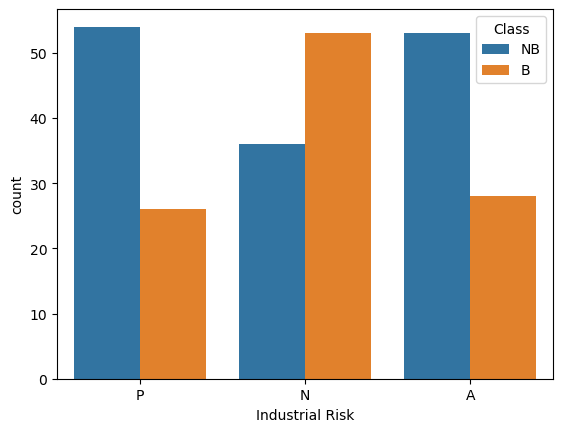

In [17]:
sns.countplot(x = 'Industrial Risk', hue = "Class", data = df)

<AxesSubplot:xlabel='Management Risk', ylabel='count'>

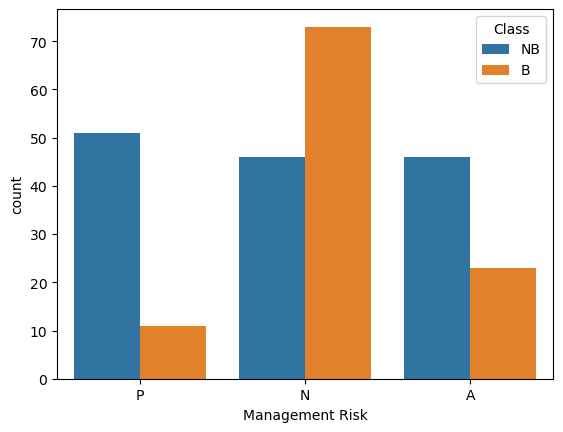

In [18]:
sns.countplot(x = 'Management Risk', hue = "Class", data = df)

<AxesSubplot:xlabel='Financial Flexibility', ylabel='count'>

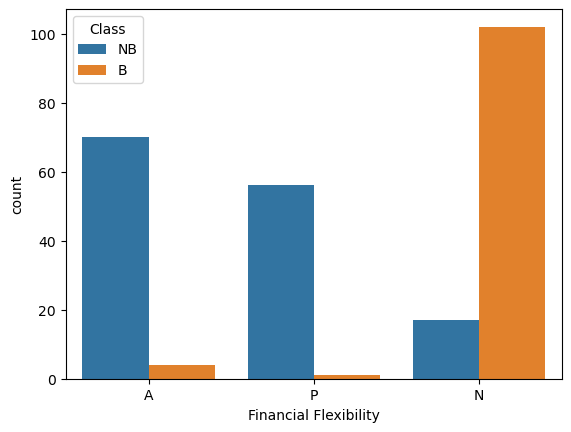

In [19]:
sns.countplot(x = 'Financial Flexibility', hue = "Class", data = df)

<AxesSubplot:xlabel='Credibility', ylabel='count'>

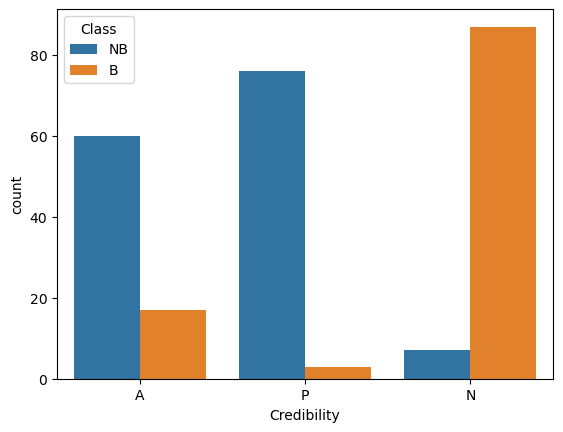

In [20]:
sns.countplot(x = 'Credibility', hue = "Class", data = df)

We can see from the plots that firms that did not have bankruptcy (blue bars) have more of Average and Positive ratings for the attributes adn firms that did experience bankruptcy (orange bars) have more of Negative ratings for the attributes. 

In [21]:
# calculate the conditional probabilities 
cond_probs = {}
for cls, subset in train_dat.groupby('Class'):
    cond_probs[cls] = {}
    for attr in subset.drop(columns = 'Class'):
        cond_probs[cls][attr] = subset[attr].value_counts(normalize = True)

In [22]:
cond_probs

{'B': {'Industrial Risk': N    0.453488
  A    0.290698
  P    0.255814
  Name: Industrial Risk, dtype: float64,
  'Management Risk': N    0.662791
  A    0.232558
  P    0.104651
  Name: Management Risk, dtype: float64,
  'Financial Flexibility': N    0.953488
  A    0.046512
  Name: Financial Flexibility, dtype: float64,
  'Credibility': N    0.837209
  A    0.139535
  P    0.023256
  Name: Credibility, dtype: float64,
  'Competitiveness': N    0.965116
  A    0.034884
  Name: Competitiveness, dtype: float64,
  'Operating Risk': N    0.604651
  A    0.232558
  P    0.162791
  Name: Operating Risk, dtype: float64},
 'NB': {'Industrial Risk': A    0.368421
  P    0.350877
  N    0.280702
  Name: Industrial Risk, dtype: float64,
  'Management Risk': P    0.342105
  N    0.342105
  A    0.315789
  Name: Management Risk, dtype: float64,
  'Financial Flexibility': A    0.491228
  P    0.385965
  N    0.122807
  Name: Financial Flexibility, dtype: float64,
  'Credibility': P    0.570175
  A

In [23]:
# show the conditional probabilities
for cls, partition in cond_probs.items():
    for feature, dist in partition.items():
        for category, prob in dist.items():
            print(f"Pr({feature}={category} | Class={cls}) = {prob}")

Pr(Industrial Risk=N | Class=B) = 0.45348837209302323
Pr(Industrial Risk=A | Class=B) = 0.29069767441860467
Pr(Industrial Risk=P | Class=B) = 0.2558139534883721
Pr(Management Risk=N | Class=B) = 0.6627906976744186
Pr(Management Risk=A | Class=B) = 0.23255813953488372
Pr(Management Risk=P | Class=B) = 0.10465116279069768
Pr(Financial Flexibility=N | Class=B) = 0.9534883720930233
Pr(Financial Flexibility=A | Class=B) = 0.046511627906976744
Pr(Credibility=N | Class=B) = 0.8372093023255814
Pr(Credibility=A | Class=B) = 0.13953488372093023
Pr(Credibility=P | Class=B) = 0.023255813953488372
Pr(Competitiveness=N | Class=B) = 0.9651162790697675
Pr(Competitiveness=A | Class=B) = 0.03488372093023256
Pr(Operating Risk=N | Class=B) = 0.6046511627906976
Pr(Operating Risk=A | Class=B) = 0.23255813953488372
Pr(Operating Risk=P | Class=B) = 0.16279069767441862
Pr(Industrial Risk=A | Class=NB) = 0.3684210526315789
Pr(Industrial Risk=P | Class=NB) = 0.3508771929824561
Pr(Industrial Risk=N | Class=NB) = 

The conditional probabilities can help us identify which attribute has large or small impact on bankruptcy status.

In [24]:
# classification function/model
## classifies test observation as bankruptcy or non-bankruptcy
def classify(test):
    probs = {}
    for cls, priorp in priors.items():
        p = priorp
        for feature, category in test.items():
            cond = cond_probs[cls][feature].get(category, 0)
            p *= cond
        probs[cls] = p
    return max(probs, key=probs.get)

In [25]:
# predict the class for the test set
predictions = x_test.apply(classify, axis = 1)

In [26]:
# calculate the accuracy of the model
acc = (y_test == predictions).sum()/len(predictions)
print('Accuracy is {:.2f}%'.format(acc*100))

Accuracy is 98.00%


In [27]:
y_test == predictions

182     True
238     True
50      True
186     True
218     True
26      True
49      True
180     True
110     True
40      True
140     True
43      True
163     True
78      True
63      True
100     True
183     True
108     True
150     True
39      True
190     True
107     True
165     True
59      True
206     True
27      True
210     True
21      True
243     True
131     True
73      True
215    False
62      True
174     True
16      True
177     True
233     True
0       True
75      True
46      True
92      True
228     True
82      True
95      True
94      True
158     True
225     True
32      True
192     True
36      True
dtype: bool

As we can see, the model correctly predicted the class 49/50 of the test dataset. Accuracy of 98% indicates that the model performed really well.